#### 라이브러리 불러오기

In [319]:
import pandas as pd
import matplotlib.pyplot as plt

# 모든 행과 열을 확인하고 싶으면 다음의 주석을 해제하면 됩니다.
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

#### 데이터 불러오기

In [320]:
# 데이터 경로 지정
path_month_4 = "./차량통행속도/04월 서울시 교통량 조사자료(2022).xlsx"
path_month_5 = "./차량통행속도/05월 서울시 교통량 조사자료(2022).xlsx"

# 데이터 불러오기
df_month_4 = pd.read_excel(path_month_4, sheet_name="2022년 04월")
df_month_5 = pd.read_excel(path_month_5, sheet_name="2022년 05월")

#### 데이터 전처리

In [321]:
# 탐색 구간 지정

# 4월
df_month_4 = df_month_4.loc[((df_month_4["지점명"]=="한강대교") | 
                            (df_month_4["지점명"]=="동작대교") | 
                            (df_month_4["지점명"]=="반포대교") | 
                            (df_month_4["지점명"]=="한남대교") | 
                            (df_month_4["지점명"]=="잠수교")) &
                            (df_month_4["방향"]=="유입")]

# 5월
df_month_5 = df_month_5.loc[((df_month_5["지점명"]=="한강대교") | 
                            (df_month_5["지점명"]=="동작대교") | 
                            (df_month_5["지점명"]=="반포대교") | 
                            (df_month_5["지점명"]=="한남대교") | 
                            (df_month_5["지점명"]=="잠수교")) &
                            (df_month_5["방향"]=="유입")]

In [322]:
# 탐색 일자 지정
df_month_4 = df_month_4.loc[(df_month_4["일자"] > 20220419)]
df_month_5 = df_month_5.loc[(df_month_5["일자"] < 20220521)]

In [323]:
# 탐색 요일 지정
df_month_4 = df_month_4.loc[(df_month_4["요일"] != "토") & (df_month_4["요일"] != "일")]
df_month_5 = df_month_5.loc[(df_month_5["요일"] != "토") & (df_month_5["요일"] != "일")]

data = pd.concat([df_month_4, df_month_5])

In [289]:
# 탐색 구간 별 분석을 위하여 다음과 같이 분류하였습니다.

# 한강대교
hangang_month_4 = df_month_4[df_month_4["지점명"] == "한강대교"]
hangang_month_5 = df_month_5[df_month_5["지점명"] == "한강대교"]
hangang = pd.concat([hangang_month_4, hangang_month_5])

# 한강대교 - 탐색 시간 지정
hangang_month_4 = hangang_month_4[["8시", "9시", "10시"]]
hangang_month_5 = hangang_month_5[["8시", "9시", "10시"]]
hangang = hangang[["8시", "9시", "10시"]]

# 동작대교
dongjak_month_4 = df_month_4[df_month_4["지점명"] == "동작대교"]
dongjak_month_5 = df_month_5[df_month_5["지점명"] == "동작대교"]
dongjak = pd.concat([dongjak_month_4, dongjak_month_5])

# 동작대교 - 탐색 시간 지정
dongjak_month_4 = dongjak_month_4[["8시", "9시", "10시"]]
dongjak_month_5 = dongjak_month_5[["8시", "9시", "10시"]]
dongjak = dongjak[["8시", "9시", "10시"]]

# 반포대교
banpo_month_4 = df_month_4[df_month_4["지점명"] == "반포대교"]
banpo_month_5 = df_month_5[df_month_5["지점명"] == "반포대교"]
banpo = pd.concat([banpo_month_4, banpo_month_5])

# 반포대교 - 탐색 시간 지정
banpo_month_4 = banpo_month_4[["8시", "9시", "10시"]]
banpo_month_5 = banpo_month_5[["8시", "9시", "10시"]]
banpo = banpo[["8시", "9시", "10시"]]

# 한남대교
hannam_month_4 = df_month_4[df_month_4["지점명"] == "한남대교"]
hannam_month_5 = df_month_5[df_month_5["지점명"] == "한남대교"]
hannam = pd.concat([hannam_month_4, hannam_month_5])

# 한남대교 - 탐색 시간 지정
hannam_month_4 = hannam_month_4[["8시", "9시", "10시"]]
hannam_month_5 = hannam_month_5[["8시", "9시", "10시"]]
hannam = hannam[["8시", "9시", "10시"]]

# 잠수교
jamsu_month_4 = df_month_4[df_month_4["지점명"] == "잠수교"]
jamsu_month_5 = df_month_5[df_month_5["지점명"] == "잠수교"]
jamsu = pd.concat([jamsu_month_4, jamsu_month_5])

# 잠수교 - 탐색 시간 지정
jamsu_month_4 = jamsu_month_4[["8시", "9시", "10시"]]
jamsu_month_5 = jamsu_month_5[["8시", "9시", "10시"]]
jamsu = hangang[["8시", "9시", "10시"]]

In [290]:
# 탐색 시간 지정
data = data[["8시", "9시", "10시"]]
df_month_4 = df_month_4[["8시", "9시", "10시"]]
df_month_5 = df_month_5[["8시", "9시", "10시"]]

#### 결과 확인

In [291]:
# 전체 데이터의 결과 수치 확인
print(data.mean())
print(df_month_4.mean())
print(df_month_5.mean())

8시     3019.873786
9시     2665.223301
10시    2519.902913
dtype: float64
8시     3064.025641
9시     2643.871795
10시    2486.820513
dtype: float64
8시     2992.968750
9시     2678.234375
10시    2540.062500
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


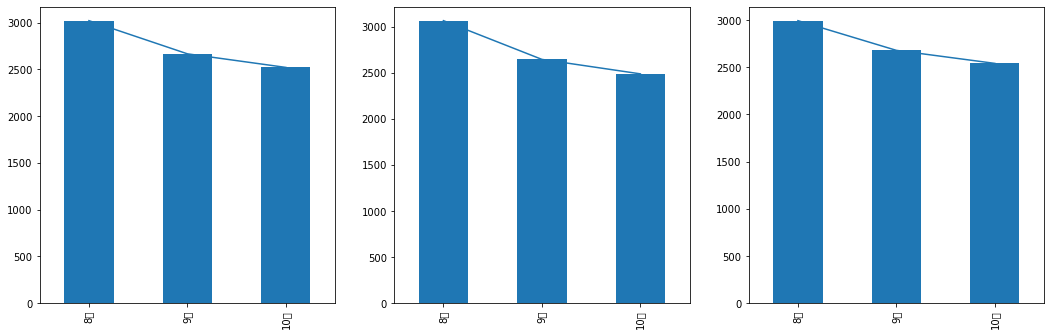

In [313]:
# 전체 데이터의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(data.mean())
print(data.mean().plot.bar())
plt.subplot(232)
plt.plot(df_month_4.mean())
print(df_month_4.mean().plot.bar())
plt.subplot(233)
plt.plot(df_month_5.mean())
print(df_month_5.mean().plot.bar())

In [279]:
# 한강대교의 결과 수치 확인
print(hangang_month_4.mean())
print(hangang_month_5.mean())
print(hangang.mean())

8시     3247.500
9시     2966.875
10시    2892.125
dtype: float64
8시     3085.333333
9시     3006.666667
10시    2925.000000
dtype: float64
8시     3161.647059
9시     2987.941176
10시    2909.529412
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


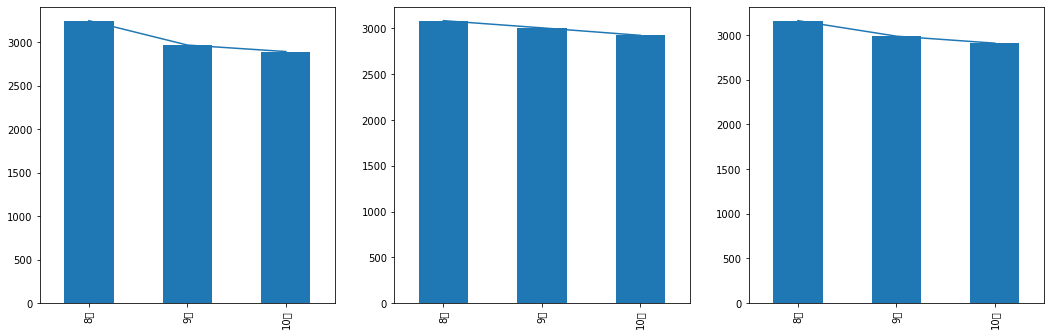

In [314]:
# 한강대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hangang_month_4.mean())
print(hangang_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(hangang_month_5.mean())
print(hangang_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(hangang.mean())
print(hangang.mean().plot.bar())

In [280]:
# 동작대교의 결과 수치 확인
print(dongjak_month_4.mean())
print(dongjak_month_5.mean())
print(dongjak.mean())

8시     2247.714286
9시     1604.142857
10시    1451.571429
dtype: float64
8시     2197.615385
9시     1702.692308
10시    1549.769231
dtype: float64
8시     2215.15
9시     1668.20
10시    1515.40
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


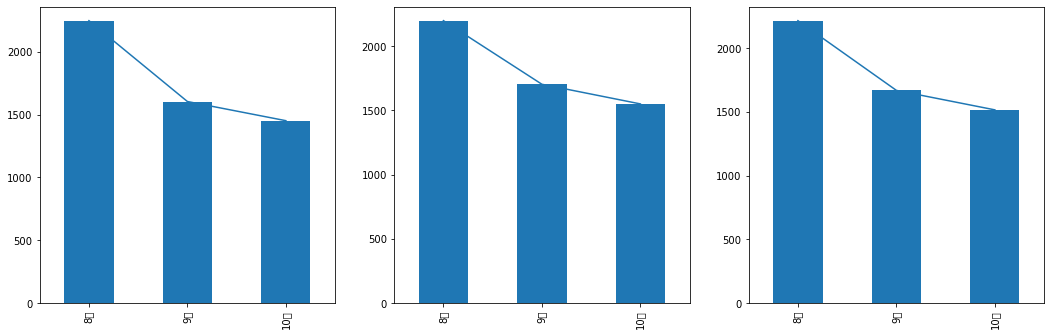

In [315]:
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(dongjak_month_4.mean())
print(dongjak_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(dongjak_month_5.mean())
print(dongjak_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(dongjak.mean())
print(dongjak.mean().plot.bar())

In [276]:
# 반포대교의 결과 수치 확인
print(banpo_month_4.mean())
print(banpo_month_5.mean())
print(banpo.mean())

8시     3603.125
9시     3137.000
10시    2920.500
dtype: float64
8시     3595.428571
9시     3217.000000
10시    2952.428571
dtype: float64
8시     3598.227273
9시     3187.909091
10시    2940.818182
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


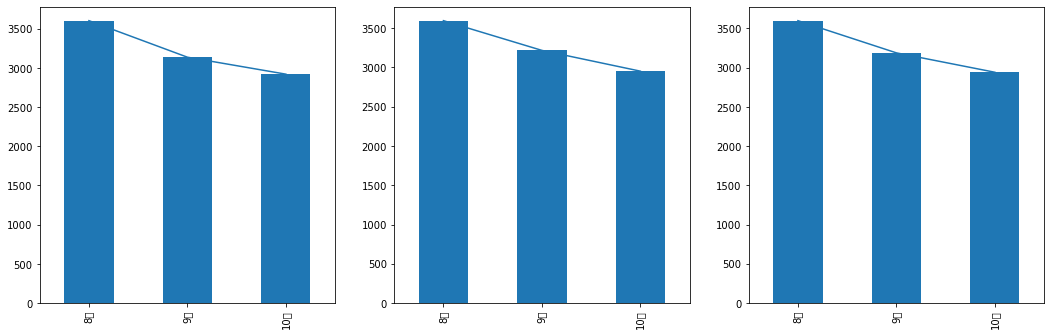

In [316]:
# 반포대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(banpo_month_4.mean())
print(banpo_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(banpo_month_5.mean())
print(banpo_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(banpo.mean())
print(banpo.mean().plot.bar())

In [277]:
# 한남대교의 결과 확인
print(hannam_month_4.mean())
print(hannam_month_5.mean())
print(hannam.mean())

8시     5612.750
9시     4949.125
10시    4596.375
dtype: float64
8시     5539.357143
9시     5086.357143
10시    4870.928571
dtype: float64
8시     5566.045455
9시     5036.454545
10시    4771.090909
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


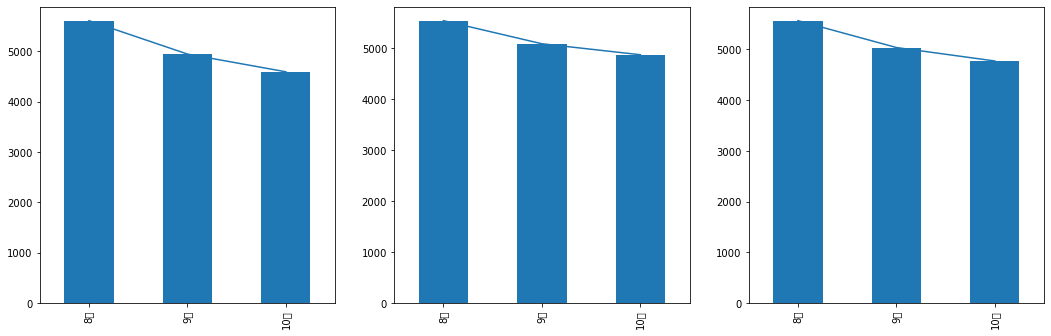

In [317]:
# 한남대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hannam_month_4.mean())
print(hannam_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(hannam_month_5.mean())
print(hannam_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(hannam.mean())
print(hannam.mean().plot.bar())

In [281]:
# 잠수교의 결과 확인
print(jamsu_month_4.mean())
print(jamsu_month_5.mean())
print(jamsu.mean())

8시     507.000
9시     432.250
10시    444.125
dtype: float64
8시     523.285714
9시     426.071429
10시    468.928571
dtype: float64
8시     3161.647059
9시     2987.941176
10시    2909.529412
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


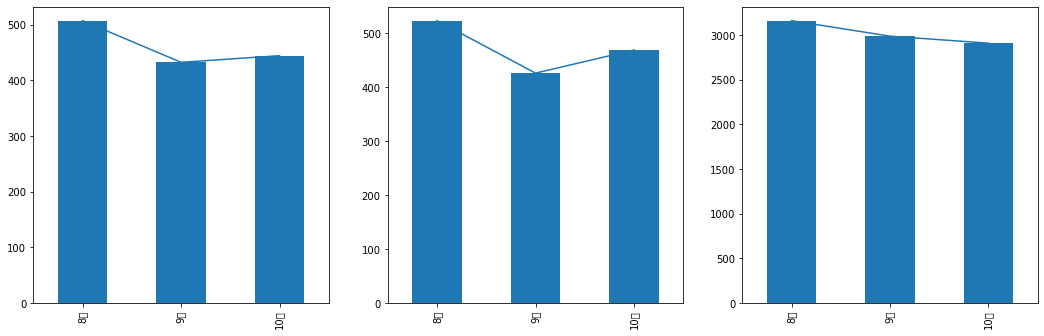

In [318]:
# 잠수교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(jamsu_month_4.mean())
print(jamsu_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(jamsu_month_5.mean())
print(jamsu_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(jamsu.mean())
print(jamsu.mean().plot.bar())